In [2]:
import pandas as pd

In [3]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


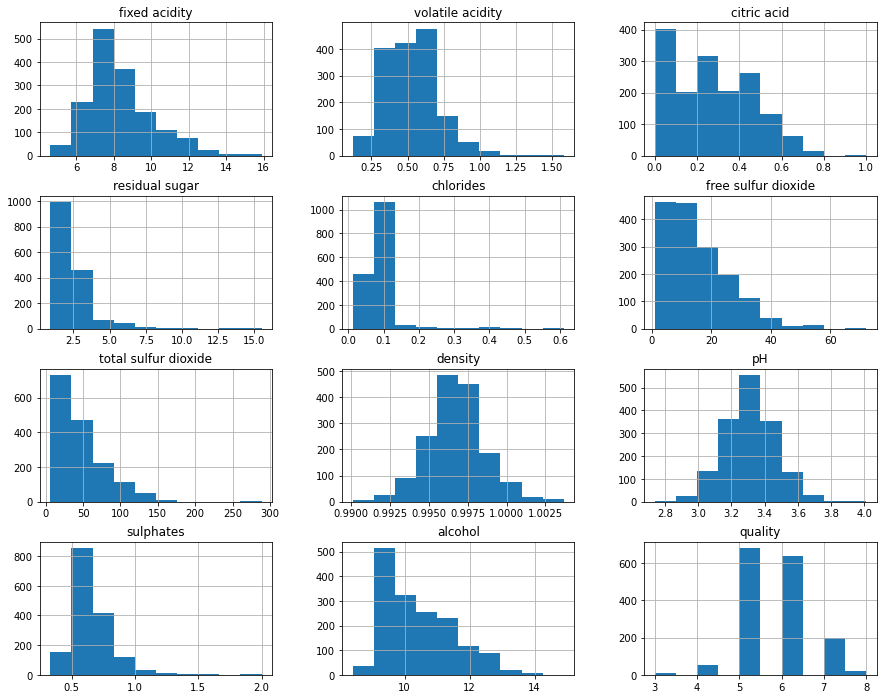

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=10,figsize=(15,12))
plt.show()

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
# so I tried multiclass classification, my most accurate model was RandomForest with 0.68 accuracy score. 
# Searching online, I saw that people have edited the data to do binary classification, so now I'll also do that.

# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [7]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [8]:
# this seems to work, although I don't like it.

# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [49]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 50)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9125


In [53]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.959375


In [54]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.925


In [56]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.921875


In [58]:
# best model is RandomForest, with 0.92 accuracy score. I think employing gridSearchCV can better this.
# let's try it out!
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [59]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}

In [60]:
random_forest = RandomForestClassifier(bootstrap = True, max_depth = 90, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators=200)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.94375


In [ ]:
# based on this, random forest worked best. GridSearchCV did not help.